# Num Trades All

In [1]:
source("JupyterUtils.R")
source("C2ScoreHypothesisPresentation.R")

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        7405      248026      0.0000     17.0000     52.0000    187.6820    160.0000   7676.0000    426.4845 


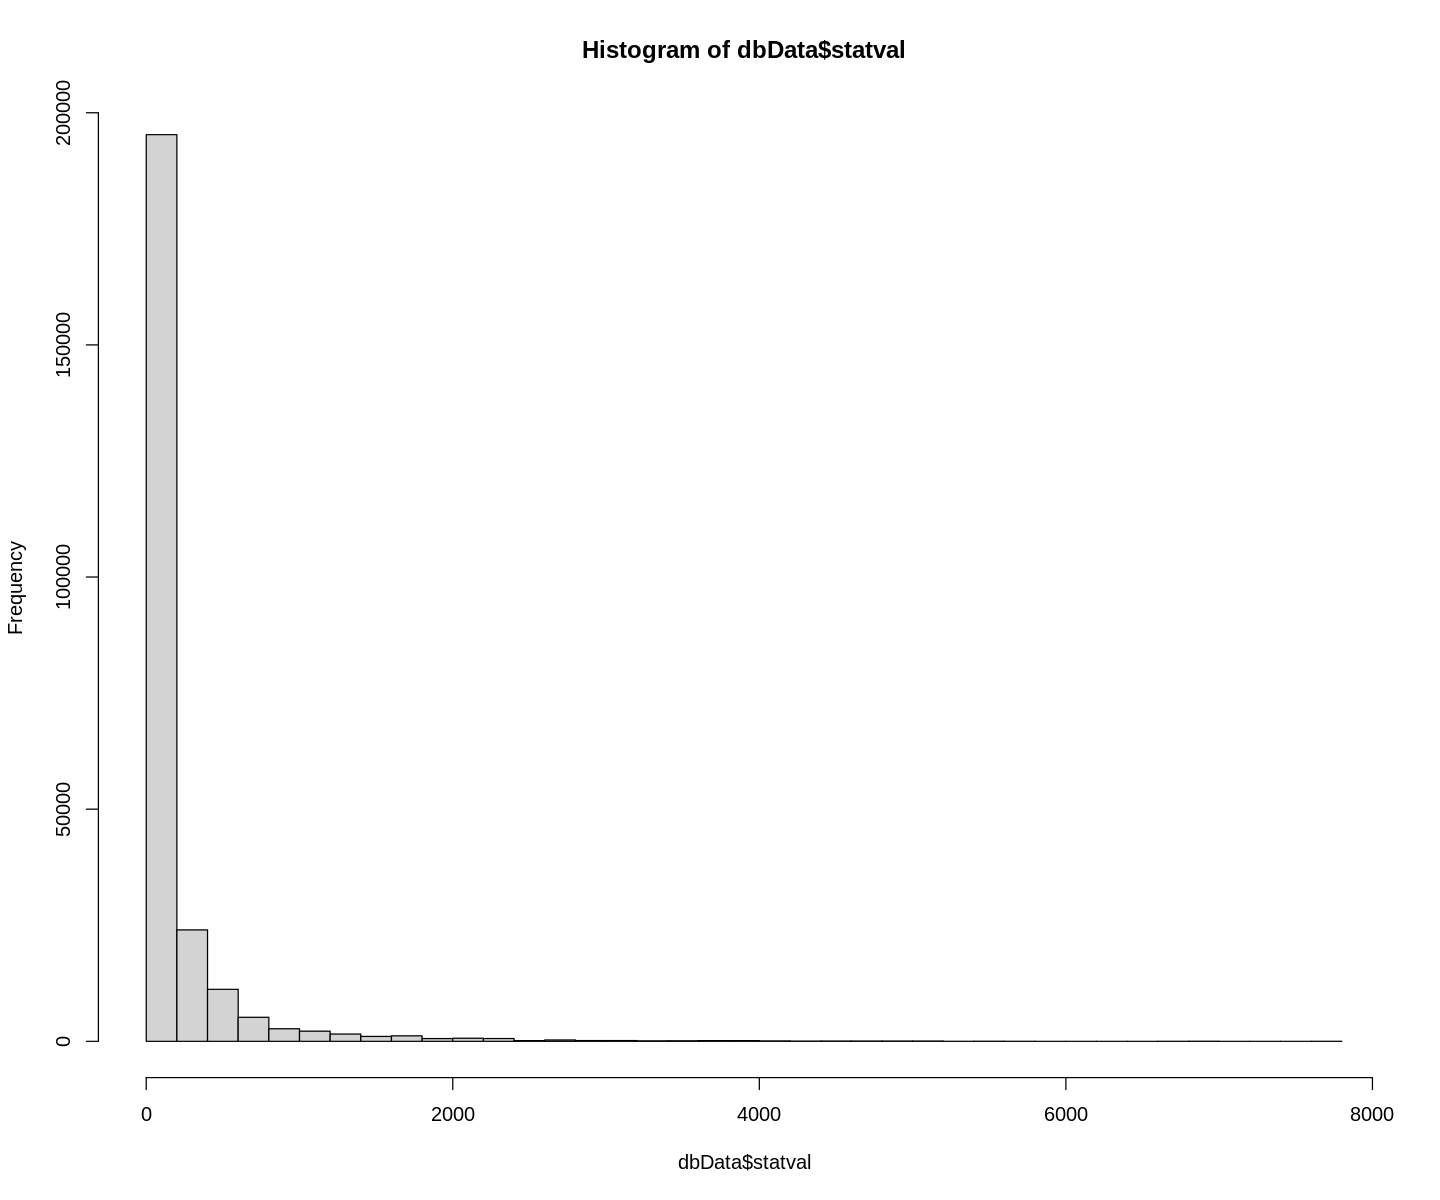

In [2]:
# What data we have.
dbData = getC2ScoreDbData("select systemid, date, statval from historical_stats_modern where statname='numtrades'")
overview(dbData)
hist(dbData$statval,breaks=50)

Too wide range for tabelation. Let's split data to two parts.

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        6443      199825     10.0000     29.0000     67.0000    140.6255    169.0000   1000.0000    178.9529 


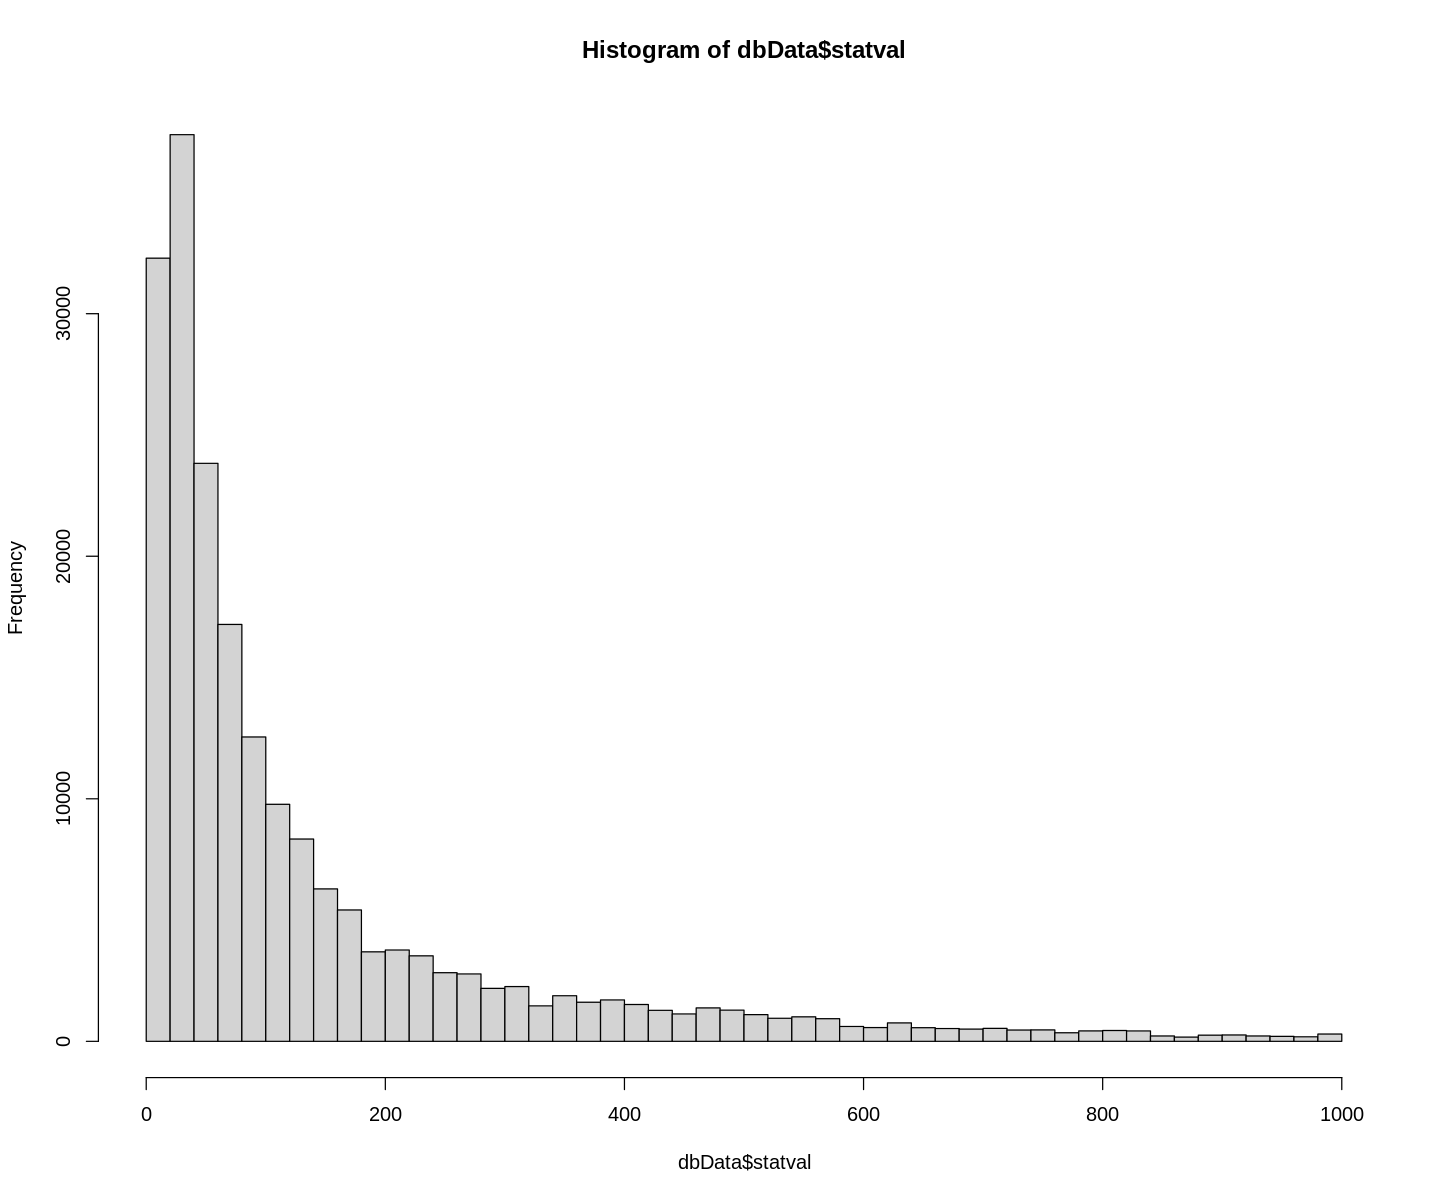

In [3]:
sql = "select systemid, date, statval 
       from historical_stats_modern 
       where statname='numtrades' and statval >= 10 and statval <= 1000"
dbData = getC2ScoreDbData(sql)
overview(dbData)
hist(dbData$statval,breaks=50)

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
         178        9666   1001.0000   1220.0000   1605.0000   1891.2844   2193.0000   7676.0000    960.8400 


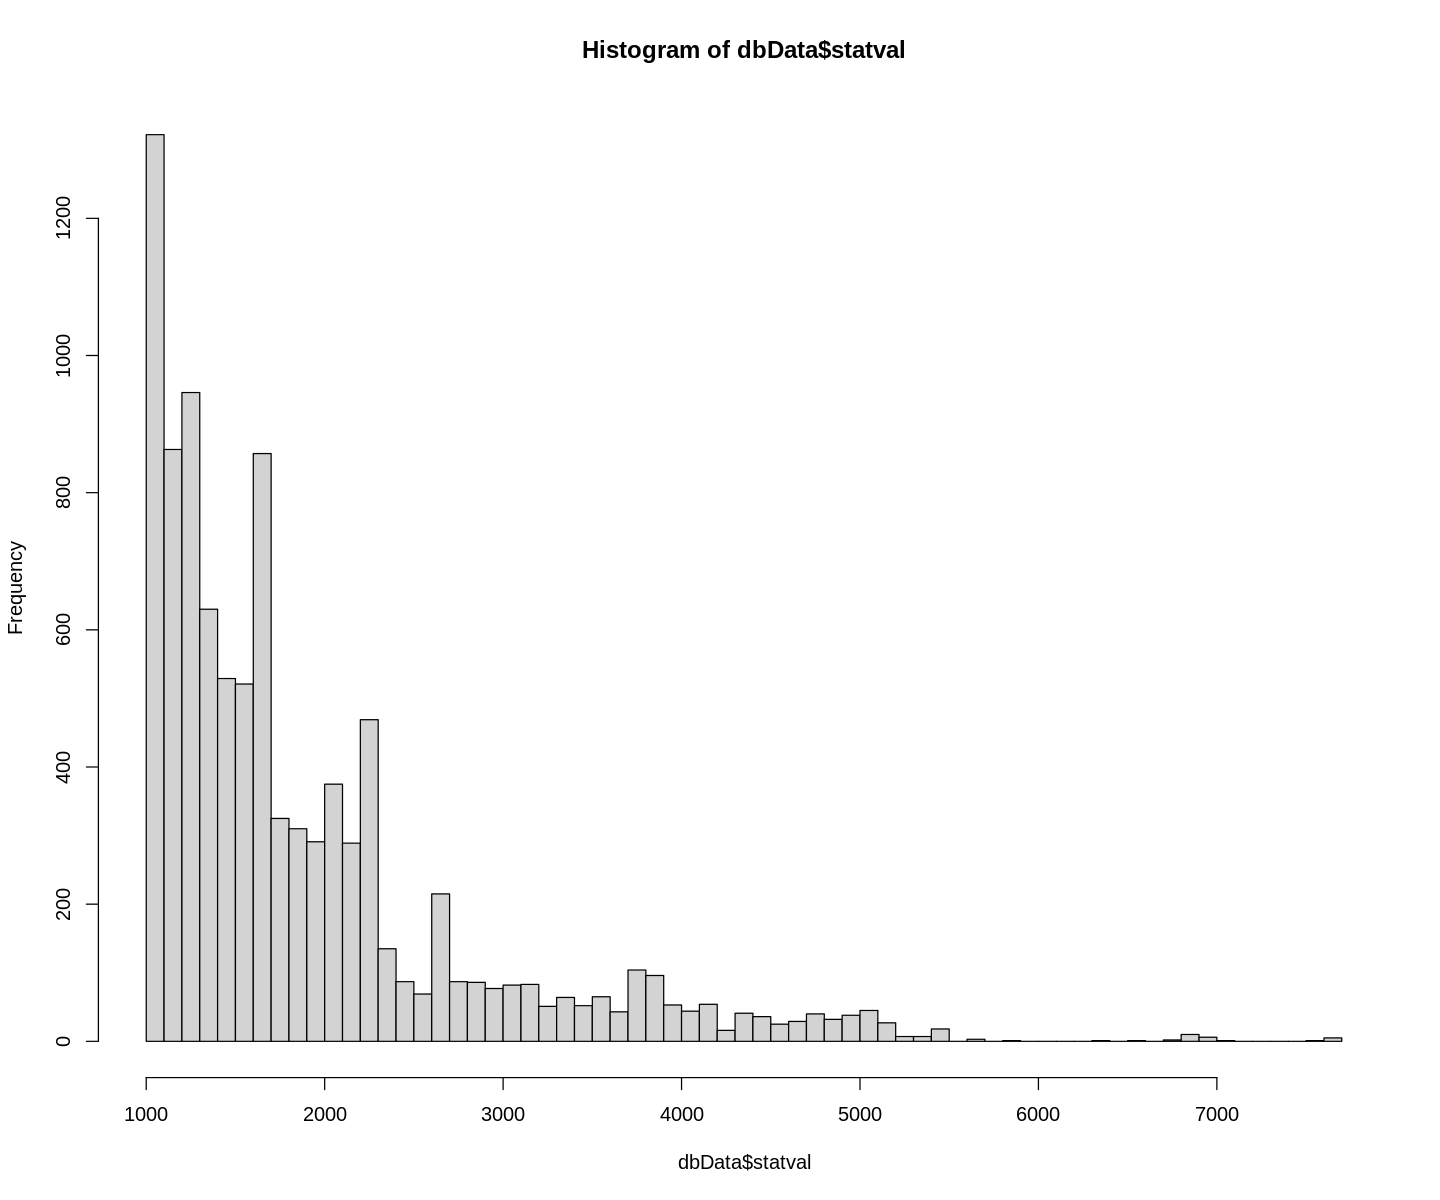

In [4]:
sql = "select systemid, date, statval 
       from historical_stats_modern 
       where statname='numtrades' and statval > 1000"
dbData = getC2ScoreDbData(sql)
overview(dbData)
hist(dbData$statval,breaks=50)

**Actually, there is only 20 live systems having more than 2500 trades there.**

In [5]:
# Actually, there is only ~20 live systems having more than 2500 trades there.
sql = "
select max(statval) as TradesNum, systemname, c2systems.systemid
 from historical_stats_modern h 
 join c2systems on c2systems.systemid = h.systemid 
 where statname='numtrades'
 and statval > 2500
 and alive = 1
 group by c2systems.systemid
 order by TradesNum;"
getC2ScoreDbData(sql)

,tradesnum,systemname,systemid
,<dbl>,<chr>,<dbl>
1,2547,Honey Badger,113600500
2,2614,higher on light volume,133605337
3,2648,TwistSTM2,90020687
4,2912,MAZE RUNNER,116136972
5,3033,HYBRID CLOUD,115032656
6,3099,Ignite,106048331
7,3120,Honey Growth Fund,117390638
8,3246,Futures DayTrade MTF,126018247
9,3411,ES vBar1,129624838


## From 10 to 1000 trades

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        2163       80568     10.0000     28.0000     66.0000    133.0468    156.0000   1000.0000    171.0772 


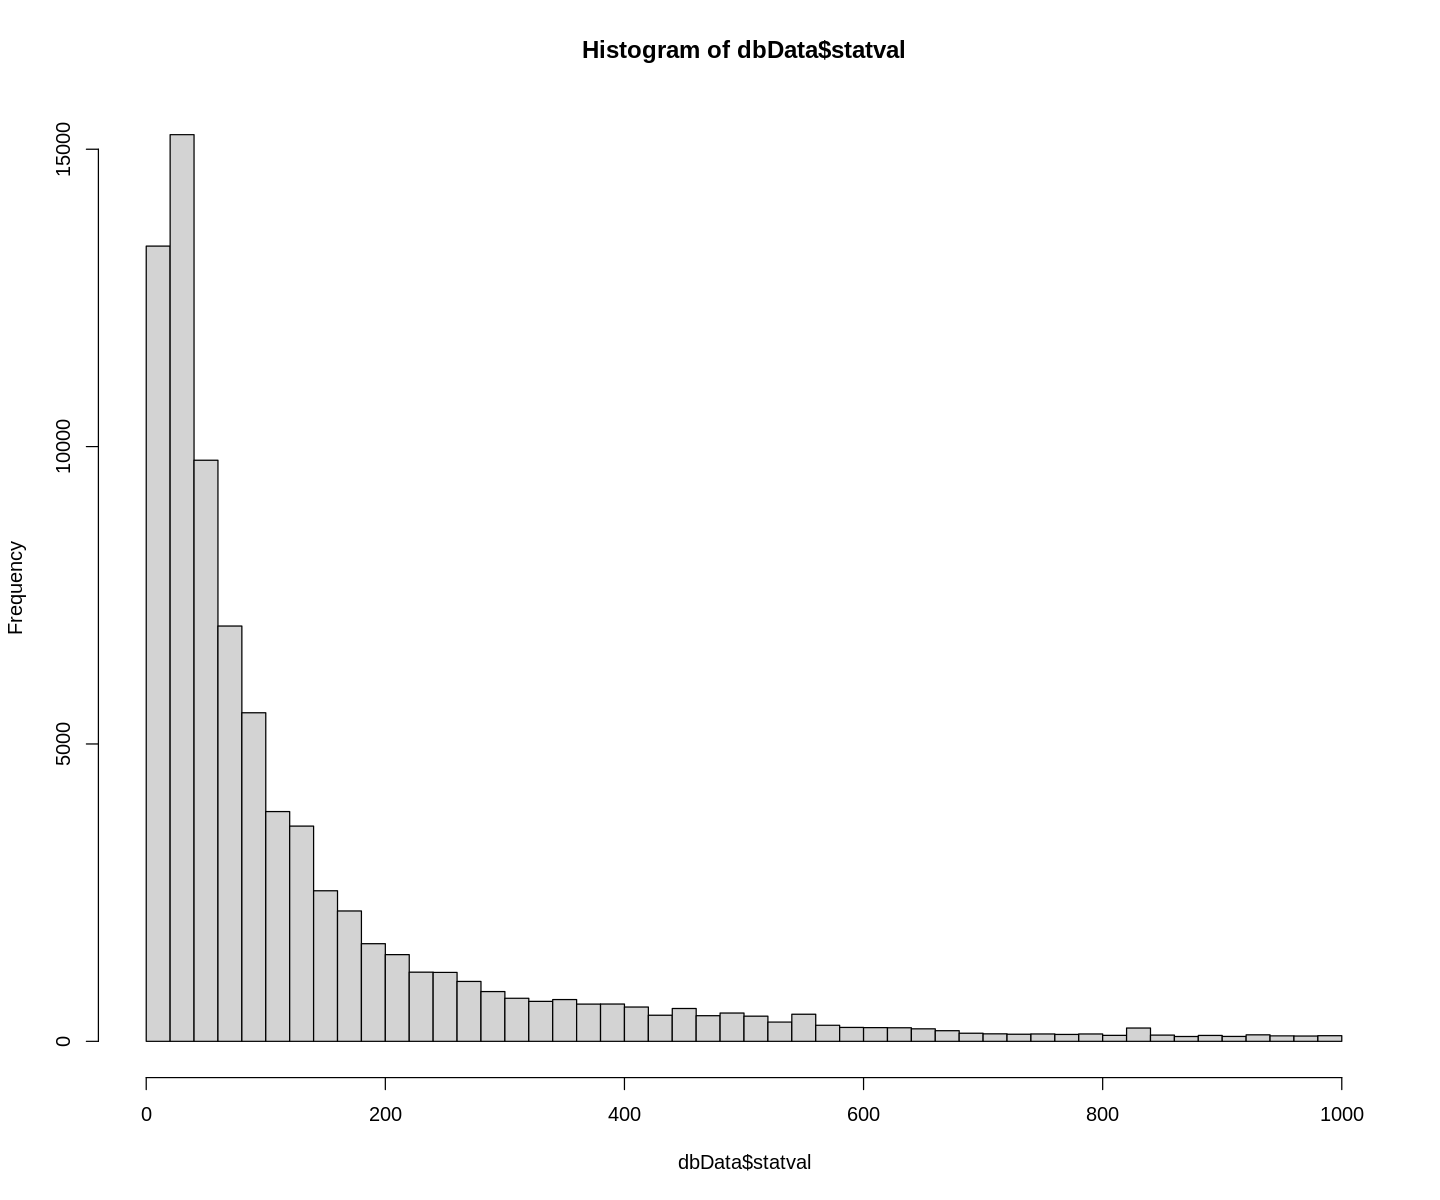

In [6]:
sql = "select statval, eq.*
 from ReturnsDataInIntervalsCleanedSkip090 eq
 join historical_stats_modern h on h.systemid=eq.systemid and h.date = DateStart
 where 
    statname='numtrades' 
    and statval >= 10
    and statval <= 1000"

dbData = getC2ScoreDbData(sql)
overview(dbData)
hist(dbData$statval,breaks=50)



We have calculated and stored the whole population statistics of strategies daily returns after 7, 14, ..., 360 days. Day after day. Now, we selected a particular statistics data (a sample) from the whole population. Collective2 data are joined with a cleaned strategies set used for the population calculations. We want to know, if the average of returns of the sample is significantly higher than an average of returns of the whole population. A significance level is  0.05 .

The following table contains this hypothesis tests for defined stats intervals and all 7, 14, ..., 360 days time intervals.


Descriptive stats of all data selected in the experiment:
     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        2163       80568     10.0000     28.0000     66.0000    133.0468    156.0000   1000.0000    171.0772 



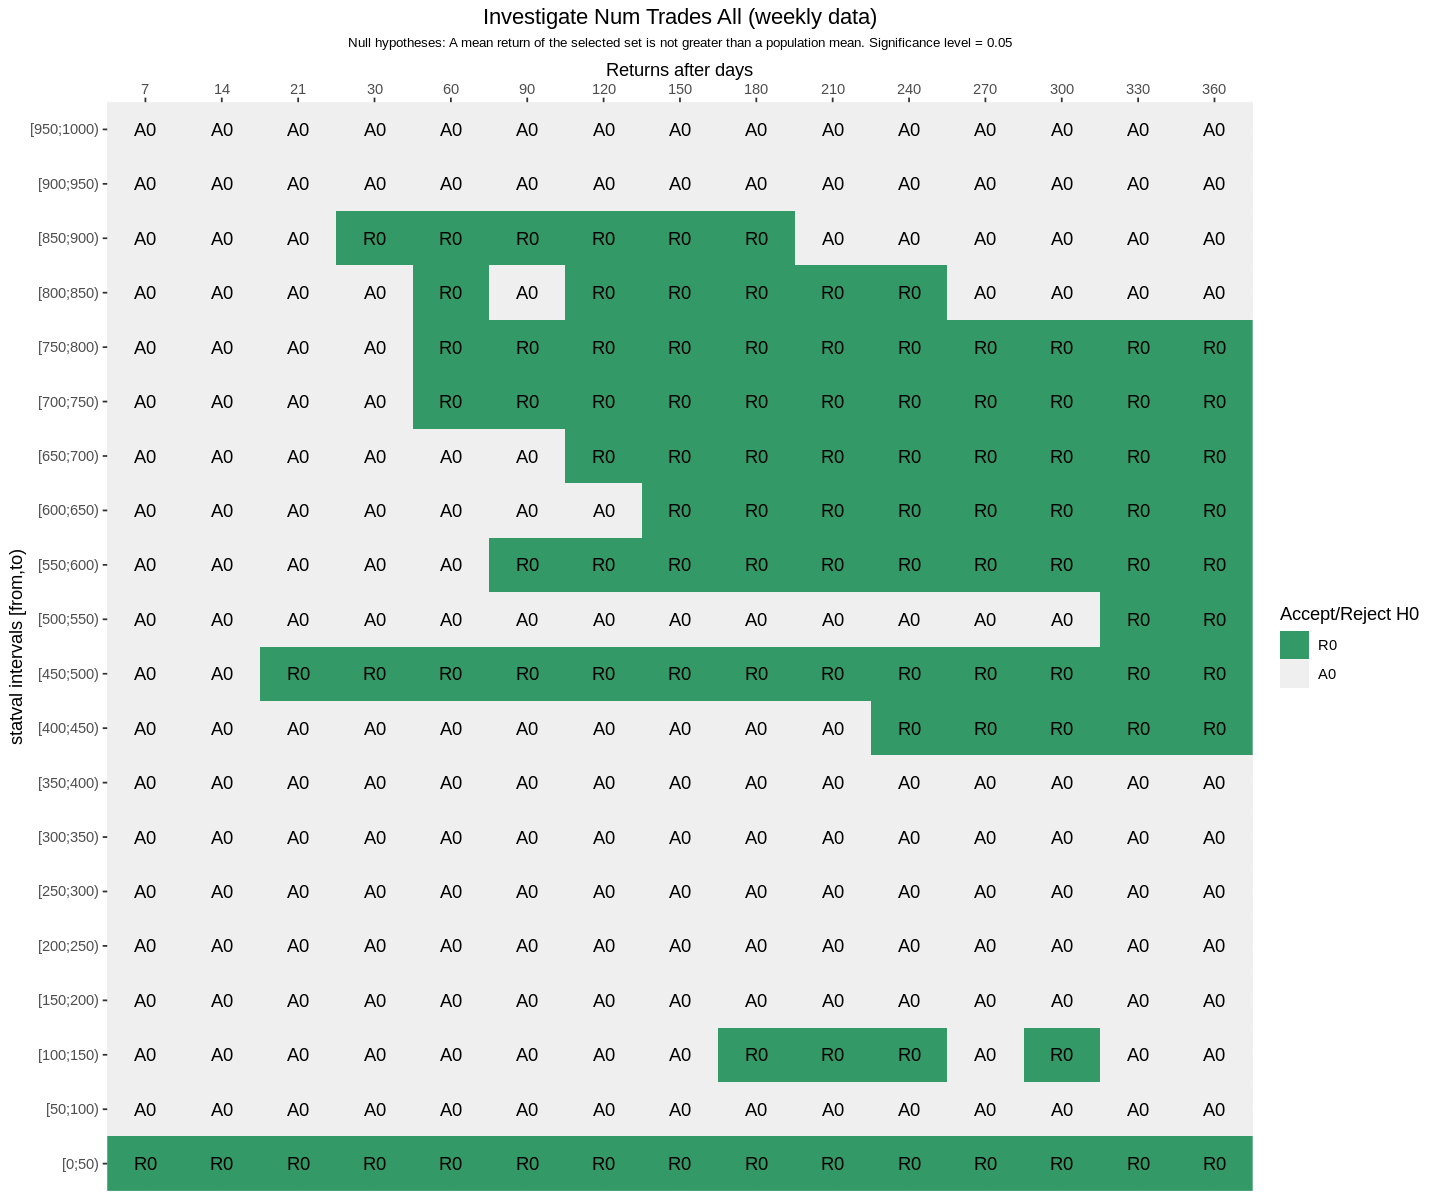

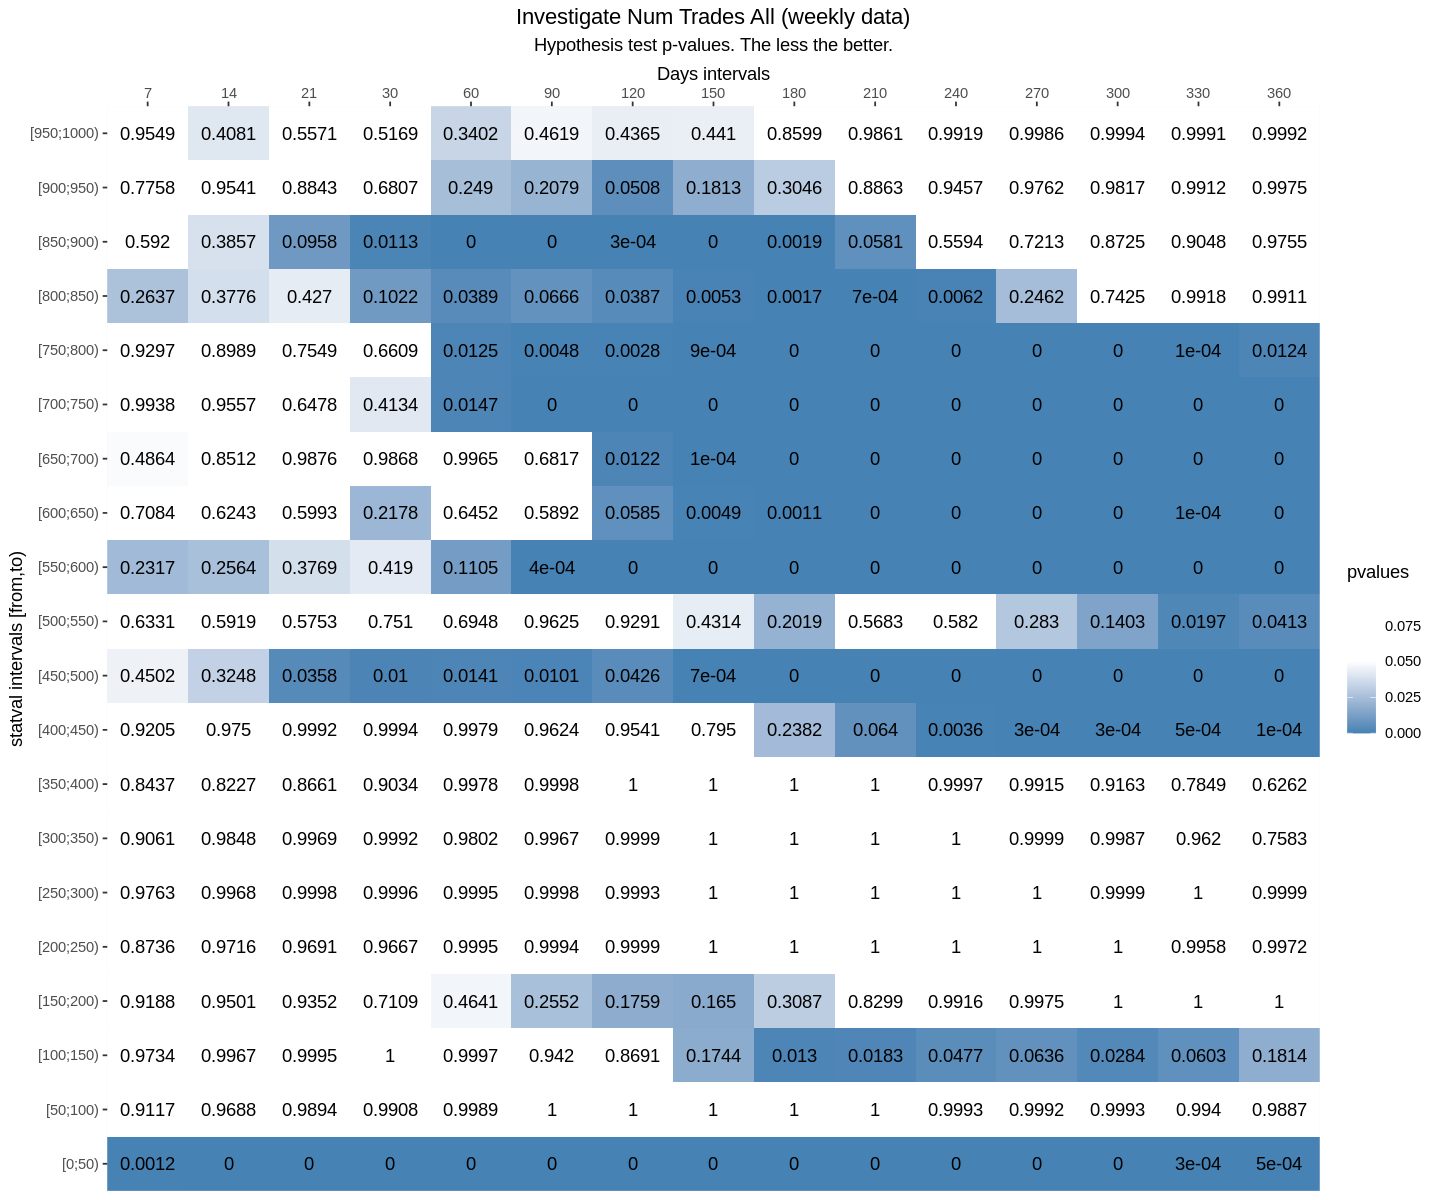

In [7]:
experiment = list(
  name = "Num Trades up to 1000",
  description = "Investigate Num Trades All (weekly data)",
  sqlText = sql, # the latest sql above
  attributeName = "statval",
  attributeSteps = seq(from = 0, to = 1000, by = 50))

result = makeExperiment(experiment)


Hypothesis test of sample standard deviation.

Alternative hypothesis: The sample standard deviation is less than the population SD.


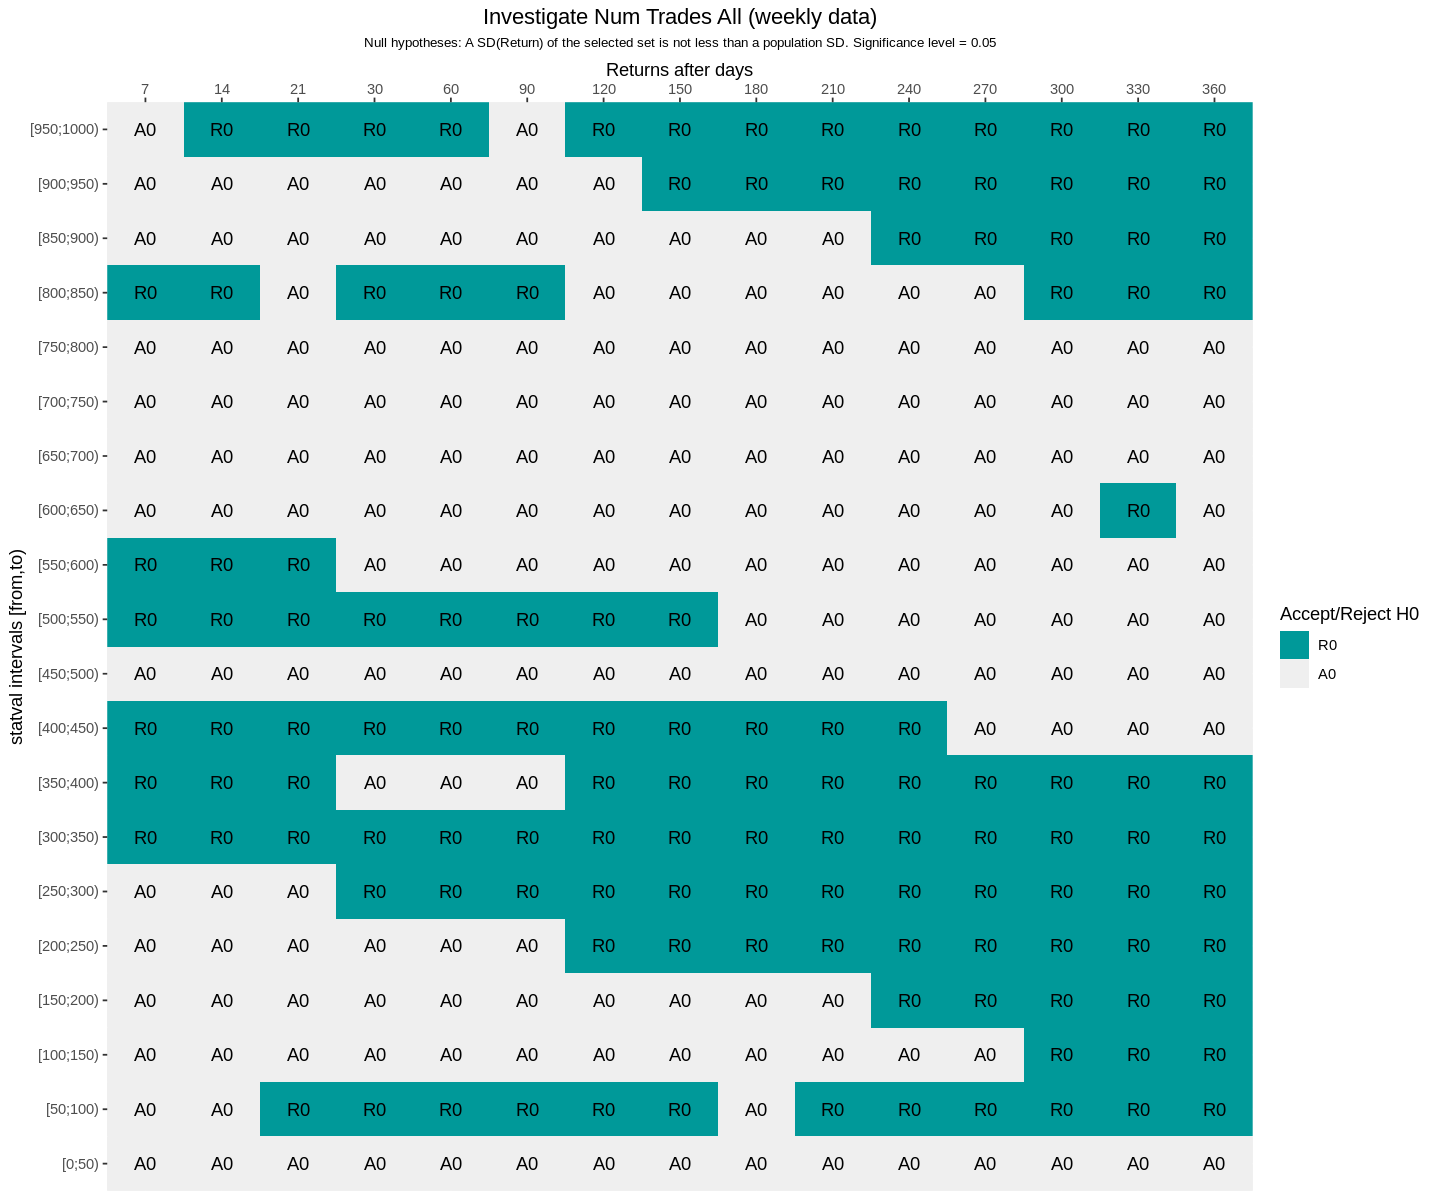

In [8]:
showSDLessHypothesisTest(experiment, result)

In [9]:
showObservationsCounts(experiment, result)


The following table contains numbers of observations in the used statistics intervals.
A number of observations in the sample is an important part of the hypothesis testing. Be careful if it is low (less than 30).
Collective2 data are calculated in 7-days intervals. It means we have less observations which decreases hypotesis testing reliability. Use daily data tests if available.
Numbers of observations shown in this table are NOT numbers of C2 strategies! Every strategy can have many observations in any statistics interval. That is what is shown here.


Selection,Obs007,Obs014,Obs021,Obs030,Obs060,Obs090,Obs120,Obs150,Obs180,Obs210,Obs240,Obs270,Obs300,Obs330,Obs360
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
950 <= statval < 1000,216,209,204,198,182,163,152,141,133,126,117,106,94,85,79
900 <= statval < 950,239,234,229,221,202,180,158,149,136,127,119,108,95,88,83
850 <= statval < 900,228,219,209,204,189,181,166,152,140,126,115,112,107,99,90
800 <= statval < 850,369,363,357,340,306,280,247,231,215,206,188,176,163,154,146
750 <= statval < 800,298,289,279,270,245,221,196,180,163,153,146,129,118,111,106
700 <= statval < 750,293,283,277,268,231,211,199,176,163,151,145,131,122,113,100
650 <= statval < 700,402,385,368,344,283,233,203,176,154,140,126,125,114,107,107
600 <= statval < 650,562,547,530,506,450,389,320,270,227,194,170,154,149,134,128
550 <= statval < 600,631,617,605,584,521,470,418,371,338,308,282,255,222,196,179



SampleMetricValue minus PopulationMetricValue

This table shows differences between metric values calculated for the whole population and the current sample metric values. (See the chapter 'Population statistics'.)
This is different from our hypothesis test. Our hypothesis test tests an (alternative) hypothesis 'Is a mean of the sample greater than a mean of the population?'
But our metric is 'Mean divided by SD'. So the standard deviation plays a role in it.
Our metric is greater when a numerator is greater and/or denominator is less. It is up to you what you prefer.



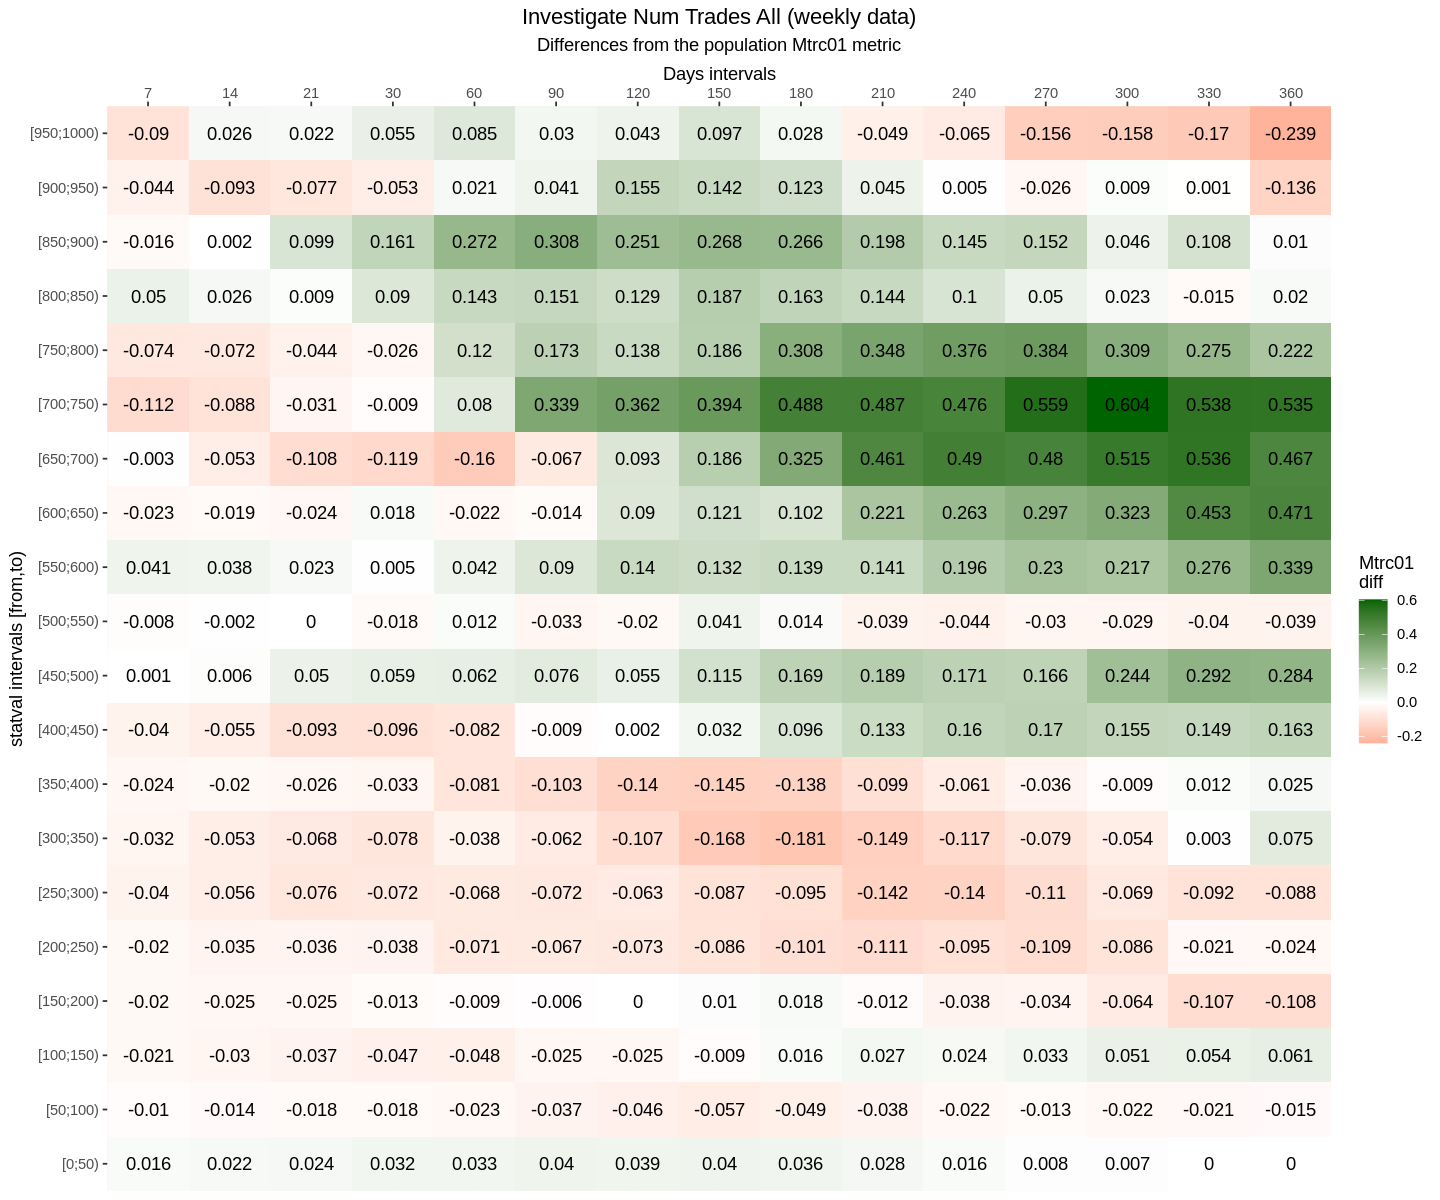

In [10]:
showMetricDifferences(experiment, result)

In [11]:
showSystemsCounts(experiment, result)



Numbers of strategies observed in defined intervals.

Selection,Sys007,Sys014,Sys021,Sys030,Sys060,Sys090,Sys120,Sys150,Sys180,Sys210,Sys240,Sys270,Sys300,Sys330,Sys360
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
950 <= statval < 1000,51,48,46,45,43,33,30,26,25,22,20,17,15,15,14
900 <= statval < 950,63,61,60,58,52,47,36,35,29,26,24,23,20,16,14
850 <= statval < 900,69,67,61,58,51,47,41,37,32,31,24,21,18,17,16
800 <= statval < 850,74,72,72,66,55,52,40,36,31,29,25,23,20,19,17
750 <= statval < 800,77,76,72,66,59,53,45,41,36,31,30,25,23,19,18
700 <= statval < 750,85,81,78,75,62,53,51,43,37,33,31,27,23,21,18
650 <= statval < 700,101,96,92,88,77,65,54,45,40,35,29,29,26,20,20
600 <= statval < 650,116,113,108,101,87,77,63,55,48,39,34,29,25,20,19
550 <= statval < 600,128,124,122,116,98,85,77,66,56,48,41,37,32,26,21


### Discussion
 
From 10 to 1000 trades.............................

## From 1000 to 2500 trades

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
          74        3199   1000.0000   1203.0000   1447.0000   1527.0000   1805.0000   2477.0000    392.4671 


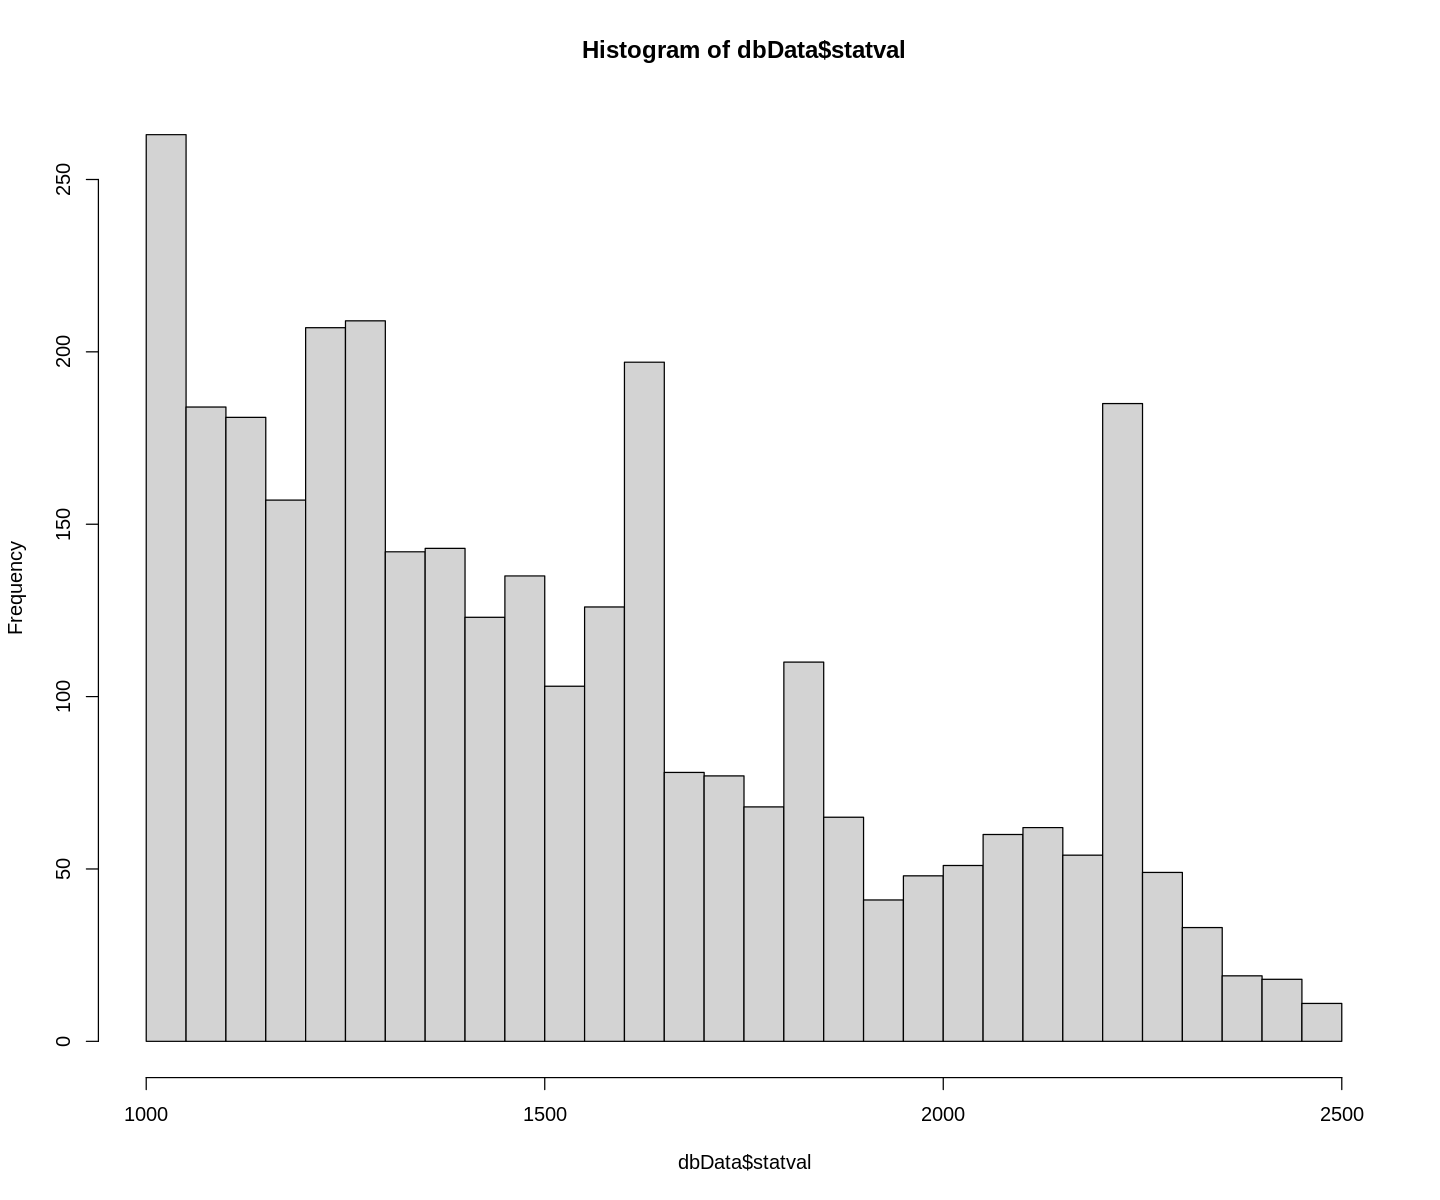

In [12]:
sql = "select statval, eq.*
 from ReturnsDataInIntervalsCleanedSkip090 eq
 join historical_stats_modern h on h.systemid=eq.systemid and h.date = DateStart
 where 
    statname='numtrades' 
    and statval >= 1000
    and statval <= 2500"

dbData = getC2ScoreDbData(sql)
overview(dbData)
hist(dbData$statval,breaks=50)



We have calculated and stored the whole population statistics of strategies daily returns after 7, 14, ..., 360 days. Day after day. Now, we selected a particular statistics data (a sample) from the whole population. Collective2 data are joined with a cleaned strategies set used for the population calculations. We want to know, if the average of returns of the sample is significantly higher than an average of returns of the whole population. A significance level is  0.05 .

The following table contains this hypothesis tests for defined stats intervals and all 7, 14, ..., 360 days time intervals.


Descriptive stats of all data selected in the experiment:
     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
          74        3199   1000.0000   1203.0000   1447.0000   1527.0000   1805.0000   2477.0000    392.4671 



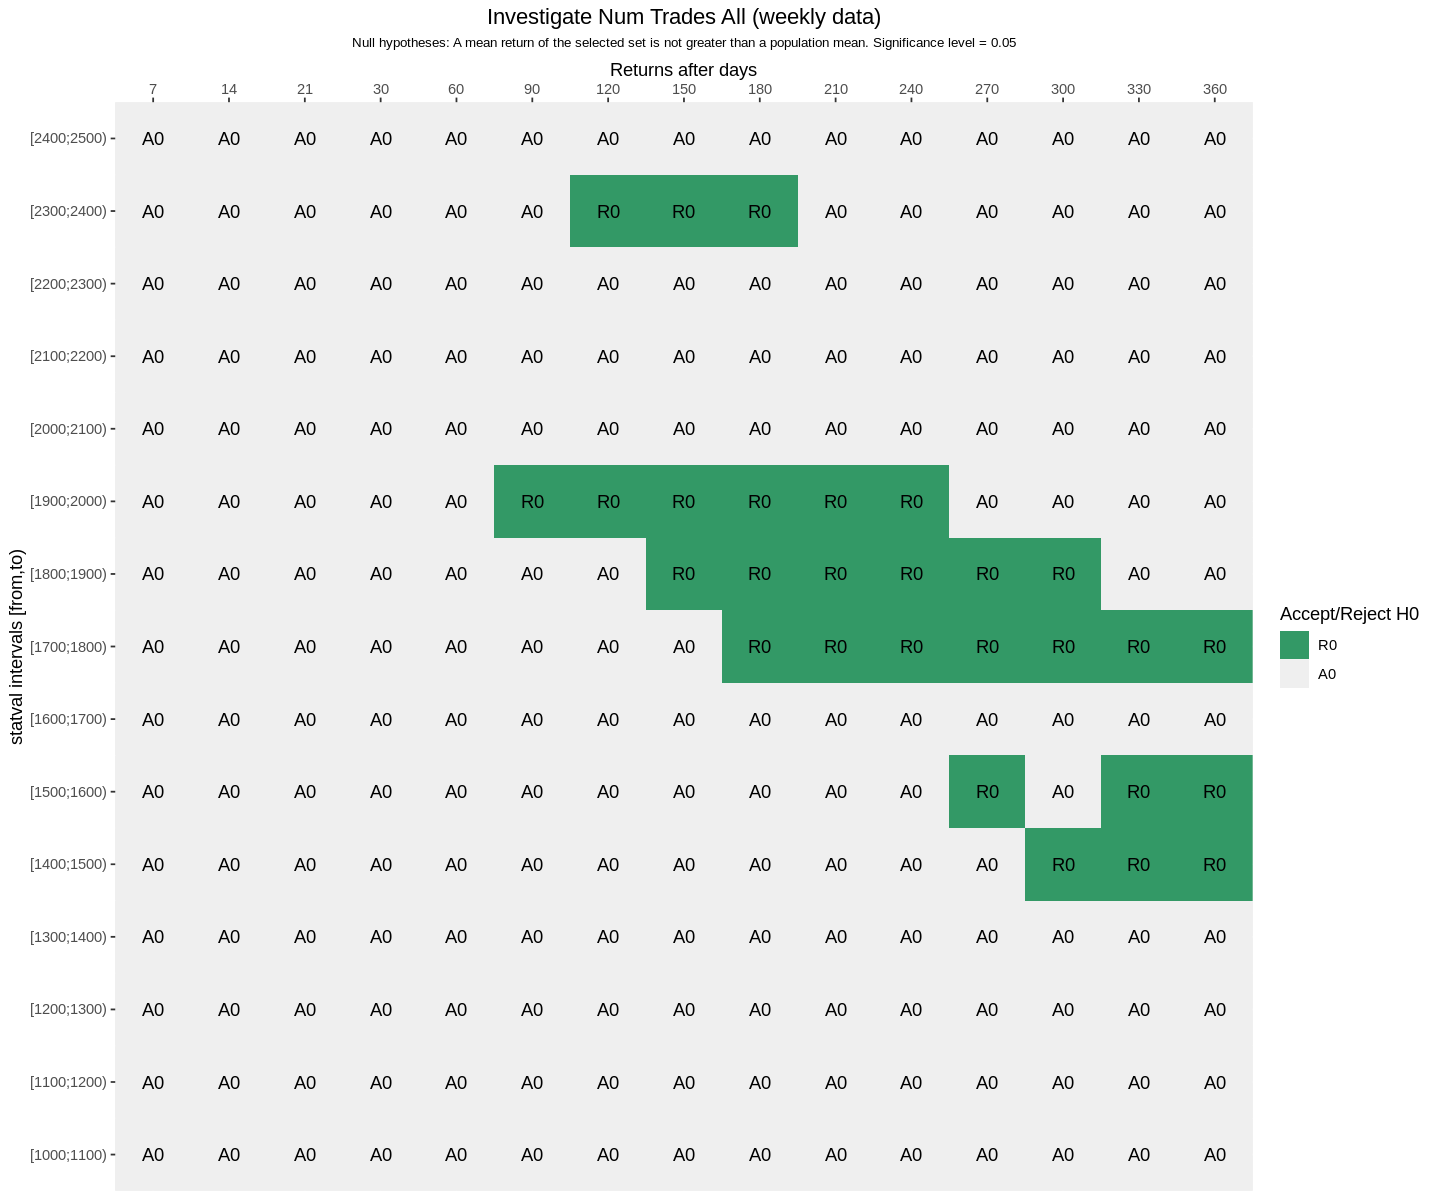

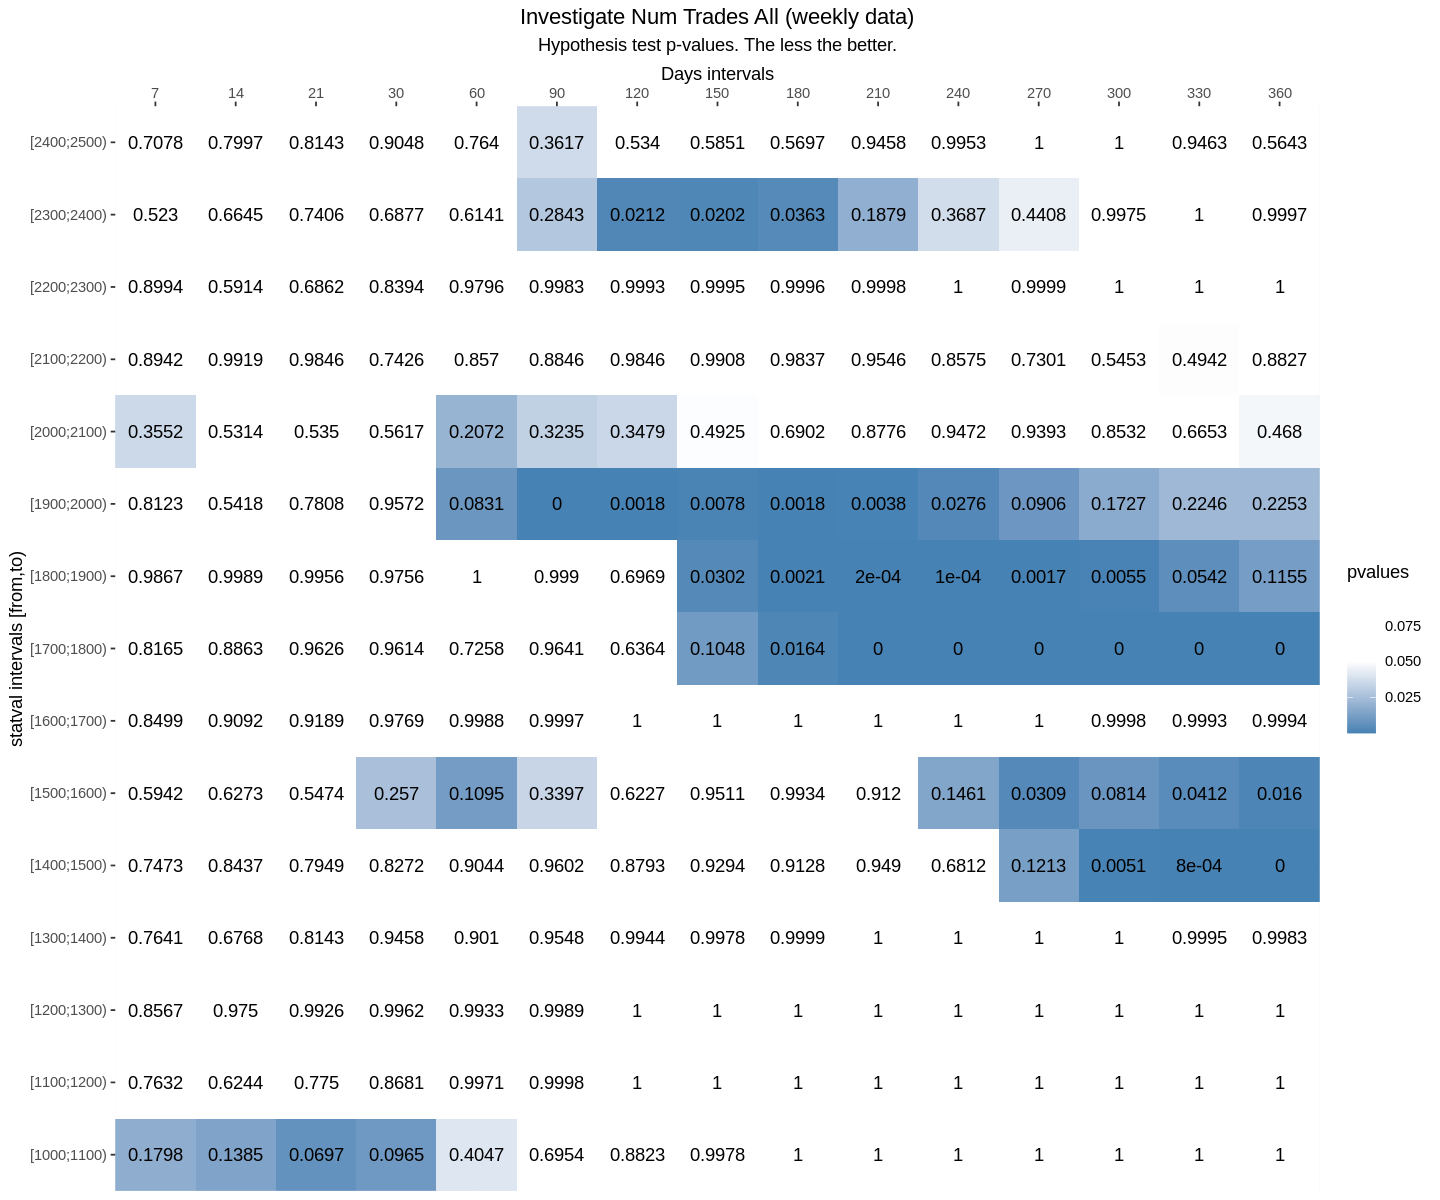

In [13]:
experiment = list(
  name = "Num Trades between 1000 and 2500",
  description = "Investigate Num Trades All (weekly data)",
  sqlText = sql, # the latest sql above
  attributeName = "statval",
  attributeSteps = seq(from = 1000, to = 2500, by = 100))

result = makeExperiment(experiment)


Hypothesis test of sample standard deviation.

Alternative hypothesis: The sample standard deviation is less than the population SD.


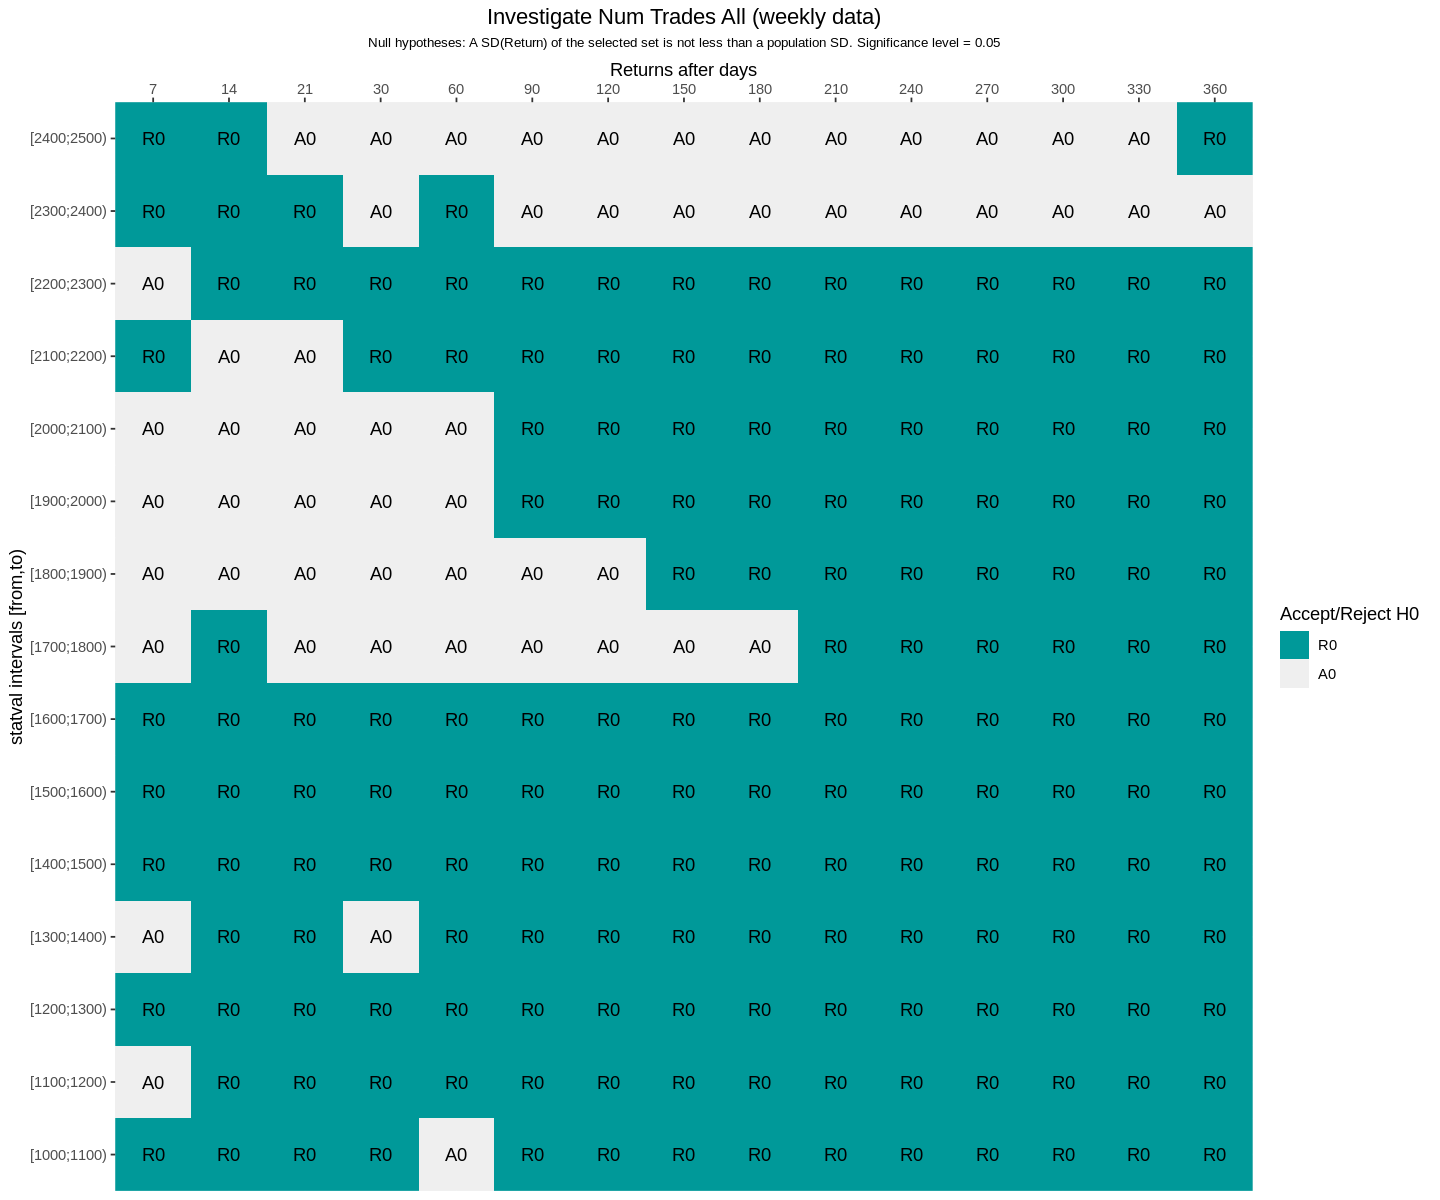

In [14]:
showSDLessHypothesisTest(experiment, result)    

In [15]:
showObservationsCounts(experiment, result)


The following table contains numbers of observations in the used statistics intervals.
A number of observations in the sample is an important part of the hypothesis testing. Be careful if it is low (less than 30).
Collective2 data are calculated in 7-days intervals. It means we have less observations which decreases hypotesis testing reliability. Use daily data tests if available.
Numbers of observations shown in this table are NOT numbers of C2 strategies! Every strategy can have many observations in any statistics interval. That is what is shown here.


Selection,Obs007,Obs014,Obs021,Obs030,Obs060,Obs090,Obs120,Obs150,Obs180,Obs210,Obs240,Obs270,Obs300,Obs330,Obs360
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2400 <= statval < 2500,28,26,23,18,13,12,11,11,11,11,11,11,7,3,2
2300 <= statval < 2400,53,50,47,41,27,19,14,13,13,13,13,13,10,8,5
2200 <= statval < 2300,231,227,224,219,202,183,159,140,125,117,112,107,103,96,92
2100 <= statval < 2200,114,112,109,104,99,93,85,77,64,51,32,16,11,11,9
2000 <= statval < 2100,109,106,104,102,88,77,72,68,63,56,52,52,41,21,9
1900 <= statval < 2000,88,87,86,84,74,61,58,57,57,56,55,51,48,48,42
1800 <= statval < 1900,170,164,158,151,137,121,97,79,70,64,62,62,61,55,53
1700 <= statval < 1800,145,143,141,137,123,116,103,95,88,78,67,67,67,67,65
1600 <= statval < 1700,273,267,263,259,250,239,224,208,197,193,188,179,171,162,153



SampleMetricValue minus PopulationMetricValue

This table shows differences between metric values calculated for the whole population and the current sample metric values. (See the chapter 'Population statistics'.)
This is different from our hypothesis test. Our hypothesis test tests an (alternative) hypothesis 'Is a mean of the sample greater than a mean of the population?'
But our metric is 'Mean divided by SD'. So the standard deviation plays a role in it.
Our metric is greater when a numerator is greater and/or denominator is less. It is up to you what you prefer.



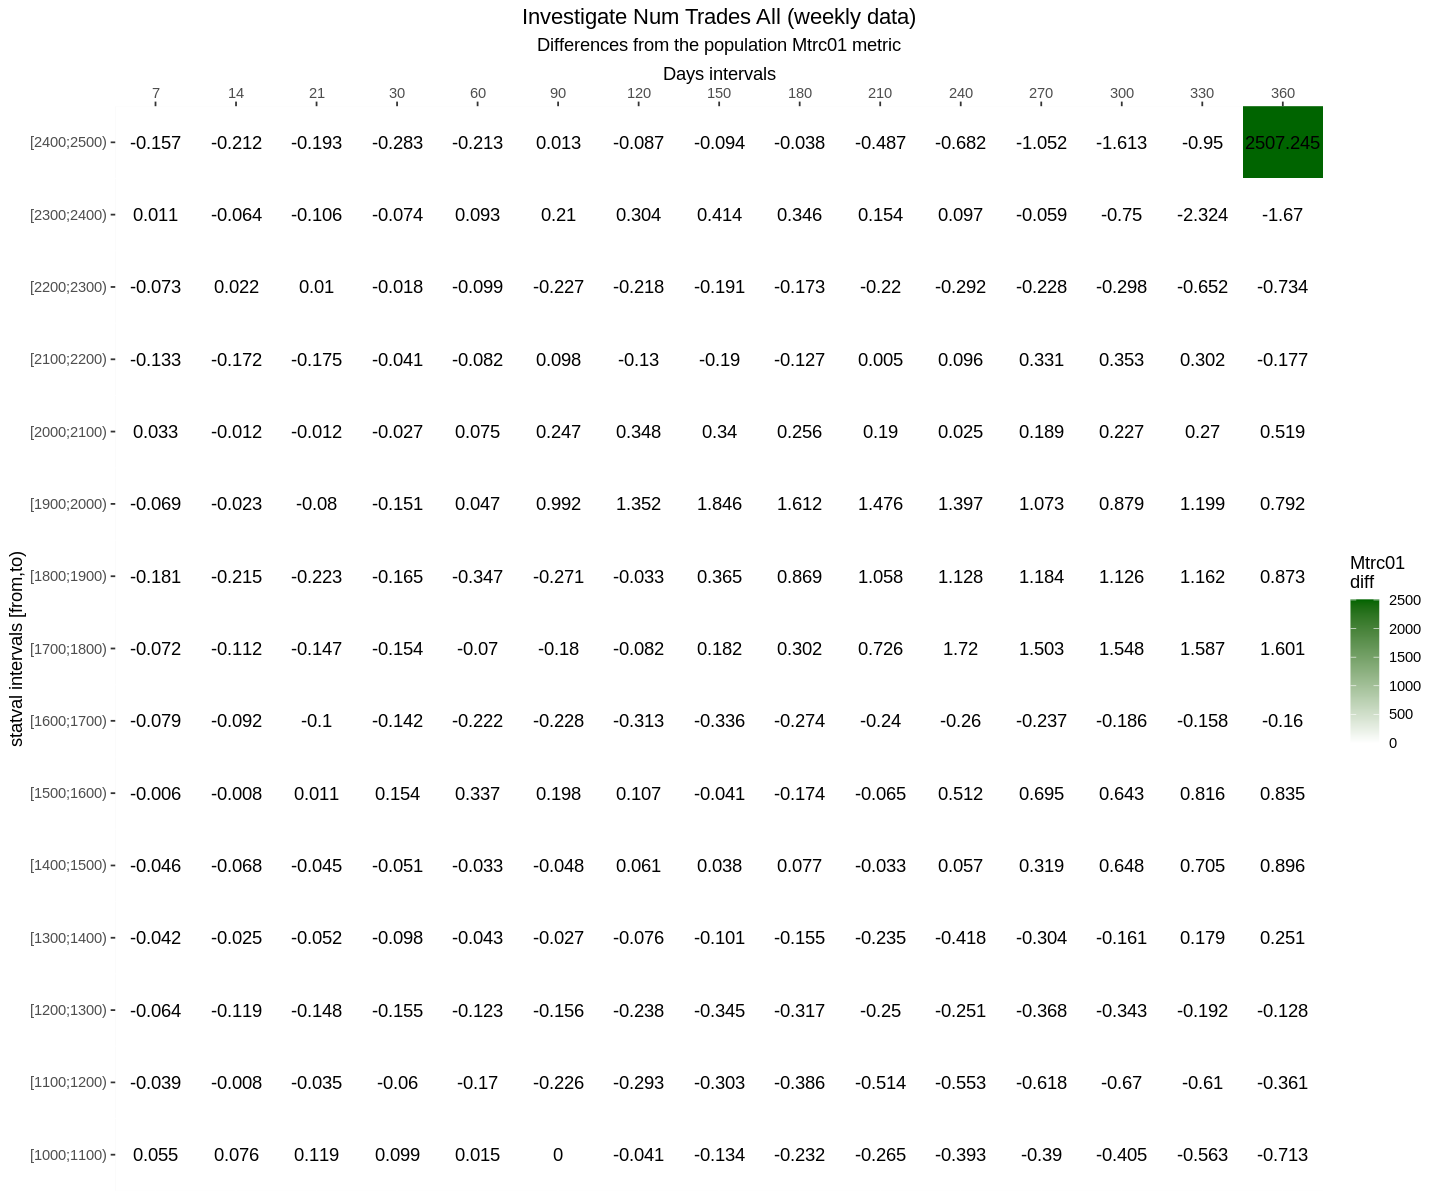

In [16]:
showMetricDifferences(experiment, result)

In [17]:
showSystemsCounts(experiment, result)



Numbers of strategies observed in defined intervals.

Selection,Sys007,Sys014,Sys021,Sys030,Sys060,Sys090,Sys120,Sys150,Sys180,Sys210,Sys240,Sys270,Sys300,Sys330,Sys360
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2400 <= statval < 2500,8,8,8,6,5,4,3,3,3,3,3,3,2,2,1
2300 <= statval < 2400,11,11,11,10,7,5,5,4,4,4,4,4,3,2,2
2200 <= statval < 2300,13,12,12,12,10,9,9,7,5,5,4,4,4,3,3
2100 <= statval < 2200,15,15,15,13,12,10,9,9,8,7,7,5,3,3,2
2000 <= statval < 2100,19,18,18,18,16,12,10,10,10,8,7,7,7,7,4
1900 <= statval < 2000,18,17,17,17,16,11,10,9,9,8,8,8,7,7,7
1800 <= statval < 1900,26,25,24,24,21,19,16,14,12,10,9,9,9,8,7
1700 <= statval < 1800,25,24,24,23,20,19,17,14,14,13,8,8,8,8,8
1600 <= statval < 1700,33,30,28,27,25,24,22,18,16,13,11,10,10,10,10


### Discussion
 
From 1000 to 2500 trades.